# <u> Coding Workshop - Weighing supermassive black holes
    
Authors: Dr Carolin Villforth, Mathilda Avirett-Mackenzie
    
Astronomical research often used coding to analyse data, work with large datasets or simulate the Universe. In this notebook, we will weigh a supermassive black hole using coding as a tool. We want to show you how coding is used in research and teach you about supermassive black hole masses as we go along. For those who are inspired to explore the science or coding further, there are links throughout.
    
In this Jupyter notebook, we will go through the simple basics of coding and how we can use coding to do science. We will be using [Jupyter notebooks](https://jupyter.org/), which use the programming language [Python](https://www.python.org/). Python is used very widely in astronomy, and many large institutions like the [Hubble Space Telescope (HST)](https://hubblesite.org/), [LIGO](https://en.wikipedia.org/wiki/LIGO) and others use Python to analyze their data. Python is also easy to learn and very popular [outside of astrophysics](https://realpython.com/world-class-companies-using-python/).
    
<u><b>A few links for those of you who would like to go further:</b>

<u>General ressources for starting to code:

- [Software Carpentry - General](https://software-carpentry.org/lessons/)

- [Software Carpentry - Python](https://swcarpentry.github.io/python-novice-inflammation/)

- [Install python on your own computer](https://docs.anaconda.com/anaconda/install/), you will need to install this if you would like to start coding yourself.


<u>Notebooks like this one, but going through more advanced data analysis:

- [Analyse graviational waves](https://www.gw-openscience.org/GW150914data/GW150914_tutorial.html)

    
<u>Other links to online activities in astrophysics:
    
- [Take an expeditions with the Sloan Digital Sky Survey, which we will be using today!](https://voyages.sdss.org/)
    
- [Help scientists understand how galaxies evolve using Galazy Zoo](https://www.zooniverse.org/projects/zookeeper/galaxy-zoo/)
    
- [Gravitational Wave hunting with LIGO](https://www.ligo.caltech.edu/page/activities-try-home)

<b>Let's get started.....
    
**Note: you will be making changes to the notebook, you can download your modified version using the 'download' button.**

## Why we use coding in science

Coding is now a central in much of research, here we want to show you some simple steps. By the end of this notebook, you will have measured the mass of a black hole and visualized the properties of a large sample of black holes.

In general, [coding - or programming-](https://en.wikipedia.org/wiki/Computer_programming) refers to designing a computer program that performs calculations or executes tasks. For example, we might write code to perform a large number of calculations faster than could be done in your head or using a calculator. Alternatively, we might use coding to control equipment, such as telescopes! To achieve this, we need to write down instructions to the computer how the calculations or tasks should be executed. We do this using a programming language, that is a language the computers will understand. There are a range of different programming languages out there, which differ in their syntax (which is a bit like grammar) and the tasks they are good at. Many of the principles however are similar across languages, so learning one makes it easier to learn others. Here we will be using [Python](https://www.python.org/), which is very popular in science. In astrophysics, we use coding for...

- <b>dealing with large datasets</b>: many of our datasets contain millions of objects, we need coding to perform even simple calculations. An example is the [Sloan Digital Sky Survey](https://www.sdss.org/) which has surveyed over half of the sky and mapped millions of galaxies and accretion black holes (we will be using some of this data ourselves very soon!).

- <b>performing complex calculations</b>: the Universe is extremely large, and the physics involved for example in galaxy evolution is very complex and we need to take into account a lot of difficult physics. Simulations of the Universe require many months on extremely powerful supercomputers to perform such complex simulations. Examples of such powerful calculations of the entire Universe include [IllustrisTNG](https://www.tng-project.org/), [EAGLE](http://icc.dur.ac.uk/Eagle/index.php), [Horizon](https://www.horizon-simulation.org/about.html) and others. You can find many great videos of the evolving universe on the linked pages, for example [here](http://www.tng-project.org/movies/tng/tng300_most_massive_cluster_gas_1080p.mp4)

- <b>visualizing data</b>: as we have already mentioned, we often have access to very large datasets and need to show them in figures, we can also do this using programming, and will do so below. Some cool visualizations include [this "flythrough" of the universe](http://www.sdss3.org/press/dr9.php) and [an exoplanet visualization](https://www.ianww.com/blog/2013/03/25/kepler-exoplanet-visualization/).

Today, we will go through simple examples of such uses and measure the mass of a black hole!

But first...

## 0. How to use this notebook

You can perform most of the tasks in this notebook without writing your own code, but by running and interacting with the code that is pre-written. Like this, you can learn about the science and also see how we can use coding in research. If you are interested in doing more, you will find opportunities to write your own code in all parts, they are marked as "your turn". There are also plenty of links to online tutorials. 

## 1. Approaching black holes

Now that we have learned some of the basics of Python, let's get started with some science. We will be talking about supermassive black holes, these are present in the centers of basically all massive galaxies. Supermassive black holes have masses of millions to billions times the mass of our own sun, which itself weights $2\times10^{30}$ kg. We know of supermassive black holes mainly when they actively accrete, i.e. when matter falls in and lights up. If you want to learn more about the background science, you can watch a short 15min talk [here](https://youtu.be/4wcTbRn3gNM). Accreting supermassive black holes are often referred to as [Active Galactic Nuclei](https://en.wikipedia.org/wiki/Active_galactic_nucleus).

### From the solar system....

But how we can possibly measure the mass of such as supermassive black hole? Let's start by considering how we measure the mass of the sun in our own solar system. You will have learned that [Kepler's laws](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion) determine the motion of planets in the solar system.

Particularly, let's look at Kepler's third law:

$\begin{equation}
\dfrac{a^3}{T^2}=\dfrac{G(M+m)}{4\pi^2}
\end{equation}$

where a is the semi-major axis, this is the distance between the planet and sun (this is called the Astronomical Unit for the earth). T is the period (this is a year for earth). G is the graviational constant, M is the mass of the sun, and m the mass of the planet.

Since we know that the planet travels around the star within a period T at the distance a, we can then also calculate the Keplerian velocity v of the planet.

$\begin{equation}
v=\sqrt{\dfrac{G*(M+m)}{a}}
\end{equation}$

And if we have a situation where the mass of the planet is very small compared to the sun, then:

$\begin{equation}
M+m \approx M
\end{equation}$

and 

$\begin{equation}
v=\sqrt{\dfrac{G*M}{a}}
\end{equation}$

So, let's calculate how fast the earth is rotating around the sun!

In [141]:
import logging
import inspect
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
plt.rcParams.update({"font.size": 14,  #My favourite default parameters to make graphs look nice.
                     "xtick.direction": "in",
                     "ytick.direction": "in",
                     "xtick.top": True,
                     "ytick.right": True})
from visualisations import *

# disable fonts
logging.getLogger('matplotlib.font_manager').disabled = True

In [57]:
## Here, we are defining some parameters
G = 6.67e-11 #units are m^3 kg^-1 s^-2
M_sun = 1.99e30 #units is kg
au = 1.5e11 # the distance of the earth to the sun in m
ly = 9.46e15 # lightyear in m
c = 2.998e8 # speed of light in m/s

In [58]:
def kepler_velocity(a, M):
    """
    This function calculated the velocity given a semi-major axis a and mass of the central object M.
    a: semi-major axis in meters
    M: central mass in kg
    returns: velocity in m/s
    """
    v = np.sqrt(G*M/a)
    return v

We can now use this simple function to calculate the rotation velocity of material around any objects, let's start with Earth:

In [59]:
velocity_earth = kepler_velocity(1.5e11, 1.99e30)
print(velocity_earth)

29747.04467113778


The strength of such function is that we can also calculate the speeds of all the planets as they orbit the sun. Let's give it a try.

In [93]:
a_mercury = 0.3871*au
a_venus = 0.723332*au #stolen from wikipedia
a_earth = au
a_mars = 1.52368055*au 
a_jupiter = 5.2038*au
a_saturn = 9.5826*au
a_uranus = 19.19126*au
a_neptune = 30.07*au
a_pluto = 39.482*au

names_solarsystem = np.array(["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"])
a_solarsystem = np.array([a_mercury, a_venus, a_earth, a_mars, a_jupiter, a_saturn, a_uranus, a_neptune, a_pluto])

velocities_solarsystem = kepler_velocity(a_solarsystem, M_sun)

print("The orbital velocities of the planets in the solar system are:")
[print("   {0:} : {1:.2f} m/s".format(name, velocity)) for name, velocity in zip(names_solarsystem, velocities_solarsystem)]

The orbital velocities of the planets in the solar system are:
   Mercury : 47811.49 m/s
   Venus : 34976.39 m/s
   Earth : 29747.04 m/s
   Mars : 24098.88 m/s
   Jupiter : 13040.18 m/s
   Saturn : 9609.53 m/s
   Uranus : 6790.35 m/s
   Neptune : 5424.72 m/s
   Pluto : 4734.17 m/s


[None, None, None, None, None, None, None, None, None]

### ..... to supermassive black holes

So how does this all relate to black holes? [Black holes](https://en.wikipedia.org/wiki/Black_hole) are massive objects, so the basic physics behind Kepler's law holds. Therefore, the calculations we have made would also apply to supermassive black holes the same way they apply to planets.

The cell below will create an interactive graph that allows you to explore the rotation velocity of material around the black hole. Move the sliders at the top to change the black hole mass (on a logarithmic scale, so 6 is 1 million solar masses ($10^6$), 7 is 10 million ($10^7$) and 9 is 1 billion ($10^9$)). You can also change the distance from the black hole, to make this relatble, the distance is given is astronomical units (the distance between earth and sun).

You will see that if you get to close to the black hole, you will be swallowed by the black hole (the red area in the plots), this is at the [Schwarzschild radius](https://en.wikipedia.org/wiki/Schwarzschild_radius), even outside this radius, once you cross the some distance, there are no more stable orbits and you will plunge torward the black hole (the yellow area). [You can see an image of this region very close to the black hole here.](https://eventhorizontelescope.org/press-release-april-10-2019-astronomers-capture-first-image-black-hole)

### Your turn: How could we measure the mass of a black hole?

Move the sliders to see how the orbital velocity changes with the black hole mass and radius. How could we use this to measure the mass of the black hole?

In [61]:
## This created the plot, you can check the code in the file visualisations.py, but it's quite advanced
interactive_plot_vr =bh_interactive(False)
output = interactive_plot_vr.children[-1]
interactive_plot_vr

interactive(children=(FloatSlider(value=50.0, description='distance', readout_format='.1f'), FloatSlider(value…

As you can see here, the velocity changes rather strongly with the black hole mass. If you have already encountered logarithms, you can create the same plot here to much further distances using a [logarithm](https://www.mathsisfun.com/algebra/logarithms.html) of the distance. If you are not familiar with this, just carry on!

In astrophysics, we often use logaritms because we look at numbers spanning a very wide range, say from 1AU to thousands of lightyears. You will see this also below when we look at a wider range of BH masses. We cannot really display such a wide range in a normal plot, the logarithm allows us to see what is going on over a wide range since each step on the axis is a factor of 10 larger. That means our axis labels are now 1,10,100,1000.... rather than 1,2,3,4. Because this does not work well on a slider, you can now enter the value for the distance.
...

In [62]:
## Same as above, but now on a log scale
interactive_plot_vr_log =bh_interactive(False, True)
output = interactive_plot_vr_log.children[-1]
interactive_plot_vr_log

interactive(children=(FloatText(value=7.5, description='distance'), FloatSlider(value=7.0, description='(log$M…

## 2. The spectrum of a feeding black hole

Luckily for us, when a supermassive black hole is accreting, gas clouds orbit it in the region we explored above. If we can measure the velocity of these gas clouds and know their distance, we can therefore measure the black hole mass by rearranging.

$\begin{equation}
v=\sqrt{\dfrac{G*M}{a}}
\end{equation}$

to

$\begin{equation}
M_{black hole}=\dfrac{v^2\times a}{G}
\end{equation}$

here v is the velocity of the cloud, a is its distance to the black hole and G is the graviational constant.

### Let's look at the spectrum of an accreting black hole

We will be looking at the spectrum of an accreting supermassive black hole taken with the [Sloan Digital Sky Survey](https://en.wikipedia.org/wiki/Sloan_Digital_Sky_Survey). You can watch the telescope at work [here](https://www.youtube.com/watch?v=AHsS57NMQjE&t=7s). The telescope observes the spectra of hundreds of objects at a time. Each objects is observed through a hole in a [large metal plate](https://blog.sdss.org/2014/09/19/sdss-plates/), you can see how the fibers are manually placed onto the holes [here](https://www.youtube.com/watch?v=i6ZOUDWRwtg). You can find more information about the telescope [here](https://voyages.sdss.org/).

[First, have a look at the object we will be studying here](http://skyserver.sdss.org/dr16/en/tools/quicklook/summary.aspx?ra=14%2013%2024&dec=53%2005%2027)

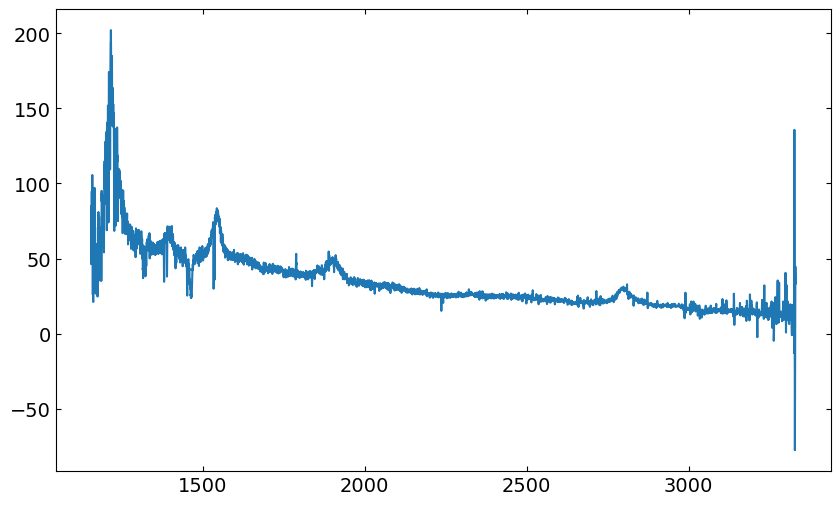

In [149]:
new_data_file_name = "op-5808-56325-0560.fits"

new_data_main = fits.getdata(new_data_file_name, 1) #main data
new_data_mc = fits.getdata(new_data_file_name, 2) #what does mc stand for?
new_data_spec = fits.getdata(new_data_file_name, 3) #spectral data

fig, axs = plt.subplots(figsize= (10,6))

plt.plot(new_data_spec.wave_prereduced, new_data_spec.flux_prereduced)
plt.show()

In [63]:
# The spectrum is saved in a text file, you can have a look at it on the main page
spectrum = np.loadtxt('spectrum.txt', delimiter=',') # this loads the spectrum
wavelength = spectrum[:,0] # the first column is the wavelength
flux = spectrum[:,1] #  second column is the flux

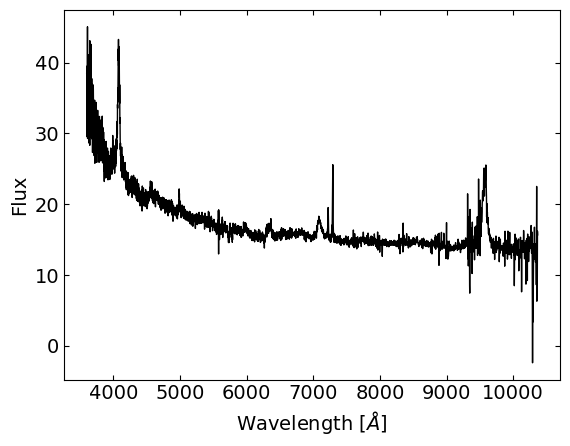

In [64]:
# We now use matplotlib which we loaded earlier to make the plot
plt.plot(wavelength, flux, ls='-', c='k', lw=1) # plot the spectrum
plt.xlabel('Wavelength [$\AA$]') # labels the axes
plt.ylabel('Flux')
plt.show()

Excellent, this is the spectrum of an accreting black hole, what we see here is the material falling into the black hole and emits light as it falls in, this is called the [accretion disk](https://en.wikipedia.org/wiki/Accretion_disk). You can see a computer simulation of the accretion disk [here](https://www.youtube.com/watch?v=2sU8UBxNPSI). You might also see some spikes near the center of the plot. Let's have a closer look at those.

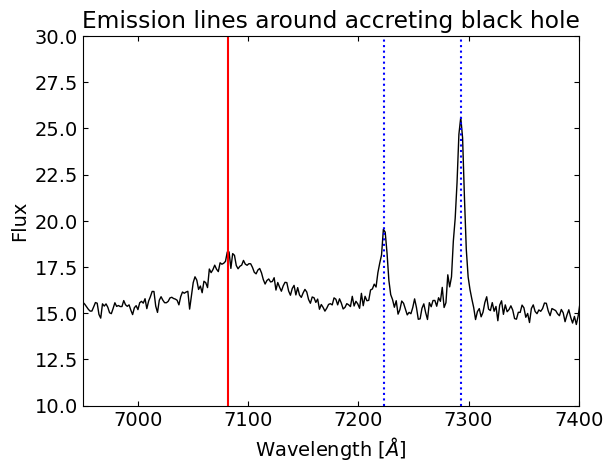

In [65]:
plt.plot(wavelength, flux, ls='-', c='k', lw=1)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux')
plt.xlim(6950, 7400)
plt.ylim(10, 30)
z=0.4563313
plt.title("Emission lines around accreting black hole")
plt.axvline(5008*(1+z), ls=':', c='b')
plt.axvline(4960*(1+z), ls=':', c='b')
plt.axvline(4863*(1+z), ls='-', c='r')
plt.show()

### How do we measure the orbital velocity of the gas cloud?

Gas clouds, like most things in the Universe, are made of atoms, which follow the laws of quantum mechanics. In particular, the electrons in these atoms exist at discrete [energy levels](https://skyserver.sdss.org/dr1/en/proj/advanced/spectraltypes/energylevels.asp), which are restricted by quantum mechanics. Electrons can drop energy levels, emitting a photon at the exact wavelength corresponding to the energy gap between the levels. Atoms can also absorb photons of the appropriate wavelength to raise an electron to a higher energy level. These processes form the basis of [spectral lines](http://skyserver.sdss.org/dr1/en/proj/advanced/spectraltypes/lines.asp), which appear at characteristic wavelengths for different types of atom (for example, [hydrogen](https://astronomy.swin.edu.au/cosmos/b/Balmer+series)).

We would expect spectral lines to be infinitely thin, existing at only one specific wavelength, but this is clearly not the case for our black hole spectrum. As the gas clouds orbit the black hole, the wavelengths of their spectral lines are changed due to the [Doppler effect](https://en.wikipedia.org/wiki/Doppler_effect), which shortens the wavelength of light emitted by an object moving towards the observer and lengthens the wavelength from an object moving away:

$\begin{equation}
\lambda_{\mathrm{observed}} = \lambda_{\mathrm{emitted}} \left( 1 + \frac{v_{\mathrm{radial}}}{c} \right)
\end{equation}$

Looking at a rotating accretion disk, we see gas moving towards us, away from us, and everything in between, and the net effect is a broad emission line whose width tells us the rotational velocity of the gas.

### Your turn: Which of the two lines should we use to measure the black hole mass?

In [66]:
interactive_plot_spec = analyze_spectrum(True)
output = interactive_plot_spec.children[-1]
interactive_plot_spec

interactive(children=(FloatSlider(value=15.0, description='baseline', max=20.0, min=10.0, readout_format='.1f'…

As you move the sliders around, you will see that you can get the red line to fit the data quite well. This is very similar to how astronomers measure the velocity of gas in such lines by measuring the difference between the model (red line) and data. We call this [fitting a model to data](https://en.wikipedia.org/wiki/Regression_analysis).

This works by first defining a function and then minimizing the distance between the model and data. This is done all the time to measure properties from the spectra, such as the line width, the redshift and the strength of different lines. Lets have a look how we can automate this measurement.

In [67]:
##First, we define the model, this is the red line plotted above.
def emlinecont(wl, cont, linepos, velocity, lineflux):
        """
        A function describing a single emission line with continuum.
        wl: wavelength
        cont: continuum flux level
        linepos: position of emission line
        velocity: width of line in km/s
        lineflux: flux of emission line
        """
        sigma = (velocity*linepos)/(c/1000)
        norm = lineflux*1000
        line = (norm / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((wl - linepos)** 2)/ (2 * sigma**2))
        full = line+cont
        return(full)

Here, we have written down the model we would like to fit, now we need code to minimize the distance between the model and data. For this, we will use another toolbox, [scipy](https://en.wikipedia.org/wiki/SciPy), specifically [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

In [68]:
from scipy.optimize import curve_fit

The spectrum covered a lot of wavelength, but we really want to focus on a very narrow range, so let's "cut" out a small part of the spectrum. (This code is a bit more advanced!)

In [69]:
wlmask = (wavelength > 6950) & (wavelength < 7200) ## this create a mask to cut out everything between 6950-7200Angstrom
fit_wl = wavelength[wlmask] ## cuts out the wavelength
fit_flux = flux[wlmask]  ## cuts out the flux

In [70]:
## You can use plt.plot to check that this had worked

We now have our **model** and our **data**, let's make a fit!

Our function curve_fit need some information to work, let's have a look:

`curve_fit(your model function, x, y, p0=*optional: your guess*)`

So, we need to give the fitting function our own model function. This was the function

`emlinecont`

we defined earlier, we also need the data, the x and y, for this, we will be using the 'cut-out' of our spectrum. Let's try:

In [71]:
fit_results, cova = curve_fit(emlinecont, fit_wl, fit_flux)
fit_results

C:\ProgramData\miniconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([16.13087013,  1.        ,  1.        ,  1.        ])

This functions first returns the results. I.e. this is what the function's best guess is for the four parameters,

`continuum, line position, velocity, line flux`

The second is the [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix) which allows us the estimate the errors. This is quite advanced, so we will ignore this here.

These results do not look right, we can check what the code has done using the code below:

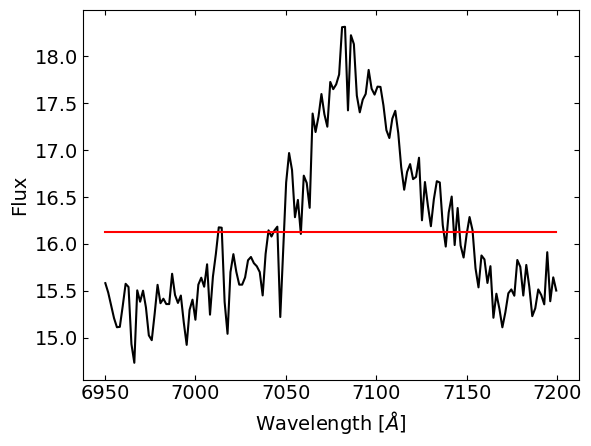

In [72]:
plt.plot(fit_wl, fit_flux, c='k') ## plot the cut-out data
plt.plot(fit_wl, emlinecont(fit_wl, *fit_results), c='r') ## plot the model fit
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux')
plt.show()

This looks terrible! The reason is that the initial guess used is poor. We can improve this by giving the routine an initial guess.

### Your turn: use the results from the interactive graph to get an initial guess!

[1.54146389e+01 7.09090915e+03 1.30196584e+03 1.80121128e-01]


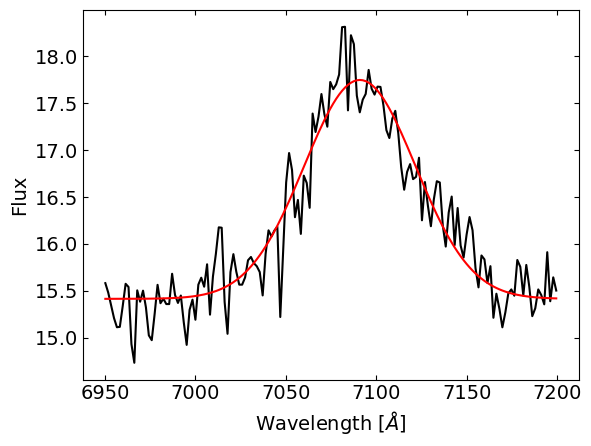

In [73]:
my_cont = 15 ### enter your guess for my_cont
my_pos = 7088 ## enter your guess for my_pos
my_vel = 1300 ## enter your guess for the velocity
my_flux = 0.3 ## enter youur guess for the flux
## Next line fits again, but with your guess
my_fit, my_cova = curve_fit(emlinecont, fit_wl, fit_flux, p0=[my_cont, my_pos, my_vel, my_flux])
print(my_fit)
plt.plot(fit_wl, fit_flux, c='k') ## plot the cut-out data
plt.plot(fit_wl, emlinecont(fit_wl, *my_fit), c='r') ## plot the model fit
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux')
plt.show()

In [74]:
my_fit[2]


1301.965840523848

You should be able to get a good fit for the velocity.

Methods like the one you just used are used to measure the properties of many thousands of objects at a time. We can simply automate code like the one we just wrote to go through a large number of objects. 

### Your turn: Let's measure the black hole mass!

$\begin{equation}
M_{black hole}=\dfrac{v^2\times a}{G}
\end{equation}$

The location of the gas emitting this line is at a distance of 200 lightdays or $6\times10^{15}$m. (this value comes from [this scientific study](https://ui.adsabs.harvard.edu/abs/2019ApJ...885...44D/abstract)) The distance of the gas from the black hole is measured using [echo mapping](https://en.wikipedia.org/wiki/Reverberation_mapping), a method similar to that used by bats to map their environments!

Write a function to calculate the black hole mass!

In [75]:
M = ((1000*my_fit[2])**2 * 6e15)/G

In [76]:
M

1.5248411243397034e+38

In [77]:
##type your own code here
def calculate_black_hole_mass(velocity, radius):
    return ((1000*velocity)**2 * radius)/G

In [78]:
##type your own code here
calculate_black_hole_mass(my_fit[2], 6e15)

Once you are done, you can type:

`tellmetheblackholemass()`

to get the correct answer. If you have gotten within a factor of a few, you have done a good job!

In [79]:
tellmetheblackholemass()

The mass of the black hole is 8 x 10^8 solar masses or 1.6 x 10^39 kg.


## 3. A whole Universe of feeding black holes.....

You have just measured the mass of a supermassive black hole! But in fact, supermassive black holes are found in basically all massive galaxies. Our own galaxy, the Milky Way, [hosts as supermassive black hole in its centre](http://www.astro.ucla.edu/~ghezgroup/gc/animations.html). The measurement of its mass earned Profs [Andrea Ghez](https://en.wikipedia.org/wiki/Andrea_M._Ghez) and [Reinhard Genzel](https://en.wikipedia.org/wiki/Reinhard_Genzel) the Nobel Prize in Physics in 2020!

In some galaxies, like the Milky Way, the black hole mass can be calculated by measuring the velocity of individual stars, [as you can see here](http://www.astro.ucla.edu/~ghezgroup/gc/animations.html), but in the vast majority of cases, the black hole masses are measured exactly the way you did above, using the gas velocities around a black hole. So, lets look at a large number of accreting black holes! We will have a look at 1000\* of them from the same dataset we looked at, for these, the same analysis we did was done already by a [scientist](http://quasar.astro.illinois.edu/BH_mass/dr7.htm).

<small>\*There are in fact about 100 000 objects that have been analyzed in such a way, but we will limit this since the service we are using will be a bit slow with the full dataset.

In [98]:
## This loads the data
agndata = np.loadtxt('sdssagn.txt', delimiter=',')
agnrightascension = agndata[:,0]
agndeclination = agndata[:,1]
agnredshift = agndata[:,2] ## this loads the redshift
agnbhmass = agndata[:,3] ## this loads the black hole masses on a logarithmic scale
agnlum = agndata[:,4]-7 ## this loads the amaount of energy emitted on a logarithmic scale converted from erg/s to Watt

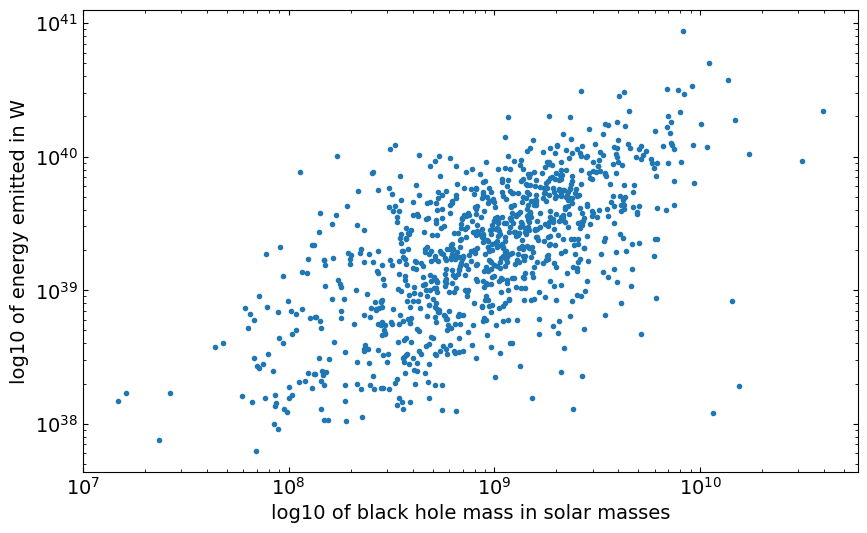

In [95]:
fig, axs = plt.subplots(figsize= (10, 6))

axs.plot(10**agnbhmass, 10**agnlum, ls='None', marker='.')
axs.set(xlabel= 'log10 of black hole mass in solar masses', ylabel= 'log10 of energy emitted in W', xscale= "log", yscale= "log")

plt.show()

What we see here is that supermassive black holes exist from about 10 million to 10 billion times the mass of the sun. We can also see that the amount of energy emitted by the accretion process is larger the larger the black hole is. This is because there is a [maximum amount of energy that can be emitted when a black hole is accreting](https://en.wikipedia.org/wiki/Eddington_luminosity), if there is more energy emitted, the accretion flow is blown apart!

But how much energy are these accretion disks emitting? An incredible 10$^{38-41}$W!!! That is 100-100 000 billion times the energy emitted by the sun! This is enormous!

That is why accreting black holes can be brighter than entire galaxies, as you can see from ['our accreting black hole'](http://skyserver.sdss.org/dr16/en/tools/chart/navi.aspx?ra=213.351149549948&dec=53.0908197984824) as well as [many](https://www.nasa.gov/content/goddard/nasas-hubble-gets-the-best-image-of-bright-quasar-3c-273/) [other](https://esahubble.org/images/opo9416a/) [accreting](https://hubblesite.org/contents/media/images/1996/35/455-Image.html?news=true) [black hole](https://www.nasa.gov/feature/goddard/2021/hubble-spots-double-quasars-in-merging-galaxies) [systems](https://www.nasa.gov/feature/goddard/2020/nasas-webb-to-study-quasars-and-their-host-galaxies-in-three-dimensions)!

### Your turn: Make your own plot.

In the file with the data, you will also find the [redshift](https://astronomy.swin.edu.au/cosmos/c/cosmological+redshift) as well as the position on the sky ([the right ascension and declination](https://skyandtelescope.org/astronomy-resources/right-ascension-declination-celestial-coordinates/), which you can use to find the objects on the sky). If you like, you can create your own plots!

In [ ]:
##add your own plot here, try plotting redshift and luminosity
plt.plot(agnredshift, 10**agnlum, ls='None', marker='.')
plt.yscale('log')
plt.xlabel('Redshift')
plt.ylabel('log10 of energy emitted in W')

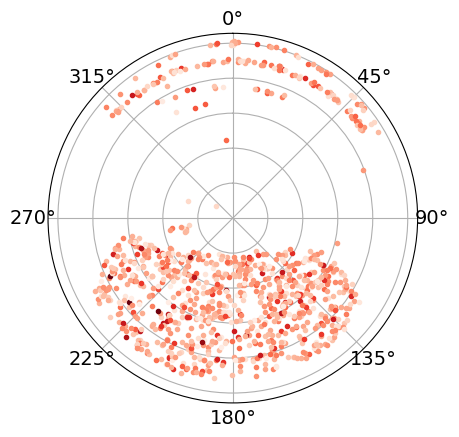

In [138]:
### BLACK HOLE STARCHART. COLORCODED BY REDSHIFT

cmap = plt.get_cmap('Reds')
normalised_agnredshift = agnredshift /agnredshift.max()
colors = [cmap(redshift) for redshift in normalised_agnredshift]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

[ax.plot(np.deg2rad(agnrightascension)[n], 90 -agndeclination[n], linestyle= "None", marker= ".", color= colors[n]) for n in range(len(agnrightascension))]
ax.set(yticklabels = [], theta_direction= -1, theta_offset= np.pi/2)  # Less radial ticks
ax.grid(True)

plt.show()

## ....and quiet black holes!

Unfortunately, for most galaxies, we cannot use the method using the gas near the black hole we used above. So, let's look at the properties of supermassive black holes in the universe! We will be looking at data from [this scientific study](https://ui.adsabs.harvard.edu/abs/2013ARA%26A..51..511K/abstract) by John Kormendy and Luis Ho.

They collected the data of supermassive black holes for which both the mass of the black hole and properties of the galaxies they reside in are known.

We will look at a famous relation between the mass of the black hole and the galaxy, known as the [M-$\sigma$ relation](https://en.wikipedia.org/wiki/M%E2%80%93sigma_relation) 

In [83]:
## Lets load some data
blackholedata = np.loadtxt('KormendyHo2013Data.txt', dtype='str', delimiter=',')
bulgemass = 10**np.array(blackholedata[:,9], dtype=float)
bhmass = np.array(blackholedata[:,11], dtype=float)
sigma = np.array(blackholedata[:,14], dtype=float)

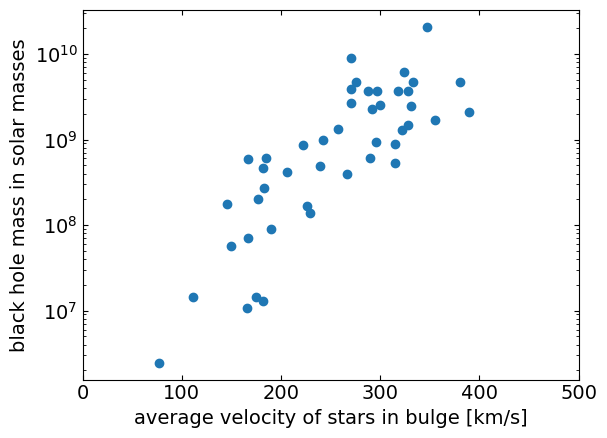

In [84]:
plt.semilogy(sigma, bhmass, ls='None', marker='o')
plt.xlim(0, 500)
plt.ylabel('black hole mass in solar masses')
plt.xlabel('average velocity of stars in bulge [km/s]')
plt.show()

We see here that the [velocity dispersion](https://en.wikipedia.org/wiki/Velocity_dispersion), which is a measure of the mass in the bulge component of the galaxy.

So, what does this plot tell us? We see that the mass of the black hole is connected to the properties of the galaxy. This is actually a very surprising finding! While the black hole is massive, its mass is still very small compared to the galaxy. The relation above has led astronomers to understand that the vast amounts of energy emitted by the black hole may in fact impact on star formation across the galaxy.

### Your turn: how massive is the black hole really?

For this dataset, I have also loaded the mass in the bulge, try plotting this against the black hole mass. You can also calculate how much smaller the black hole is than the galaxy bulge. (try e.g. bhmass+bulgemass to see what happens!, you can calculate with these variables just like you would with numbers)

In [85]:
##your code here
plt.plot(bulgemass, bhmass, ls='None', marker='.')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Log of bulge mass')
plt.ylabel('Log of black hole mass')

# Conclusion
    
In this notebook, you should have learned some of the ways in which we use coding in scientific research, and some of the main methods, like functions. The links in the notbook lead you to more ressources to learn more!
    
You also learned how to measure black hole masses and measured your own black hole mass!

[We hope you had fun!](https://xkcd.com/353/)
    
